In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sinusoidal(x, args=[1]*6):
    return args[0]*np.sin(x*args[1]+args[2])+args[3]*np.cos(x*args[4]+args[5])

def update_weights_single(weights,epochs=100,lr=0.01,print_loss=False,delta = 0.001,lr_random=False):
    
    for n in range(epochs):
        for colum,i in enumerate(weights):
            for row,w in enumerate(i):
                    
                loss_current = loss_func(y,predict(weights))
                
                delta_weights = weights.copy(); delta_weights[colum,row]+=delta
                loss_delta = loss_func(y,predict(delta_weights))
                
                partial = (loss_delta-loss_current)/delta
                
                if lr_random: lr = np.abs(np.random.exponential(0.001125))
                weights[colum,row]-=partial*lr
        if print_loss:
            if n%(epochs//10)==0:
                print(f"Epochs: {n} \t Loss: {loss_current}")
    return weights

def update_weights(weights,epochs=100,lr=0.01,print_loss=False,delta = 0.001,lr_random=False):
    
    for n in range(epochs):
        grad = np.zeros(weights.shape)
        for colum,i in enumerate(weights):
            for row,w in enumerate(i):
                    
                loss_current = loss_func(y,predict(weights))
                
                delta_weights = weights.copy(); delta_weights[colum,row]+=delta
                loss_delta = loss_func(y,predict(delta_weights))
                
                partial = (loss_delta-loss_current)/delta
                grad[colum,row] = partial
        if lr_random: lr = np.abs(np.random.exponential(lr))        
        weights-=grad*lr
        if print_loss:
            if n%(epochs//10)==0:
                print(f"Epochs: {n} \t Loss: {loss_current}")
                
    return weights

@np.vectorize
def step_func(x):
    if x>0:
        return 1
    else:
        return -1
    
def poly(x):
    return 2.5*x**3+2*x**2
    
def loss_func(y,y_pred):
    return sum((y-y_pred)**2)

def predict(weights):
    return np.sum([sinusoidal(x, w) for w in weights],axis=0)

Epochs: 0 	 Loss: 4465.512691758428
Epochs: 20 	 Loss: 1.3997711580071672
Epochs: 40 	 Loss: 0.713326378740817
Epochs: 60 	 Loss: 0.575184463531451
Epochs: 80 	 Loss: 0.5037062763384481
Epochs: 100 	 Loss: 0.45734655374734917
Epochs: 120 	 Loss: 0.42518313419206727
Epochs: 140 	 Loss: 0.40177357636639305
Epochs: 160 	 Loss: 0.3838274982530324
Epochs: 180 	 Loss: 0.36936460063053544


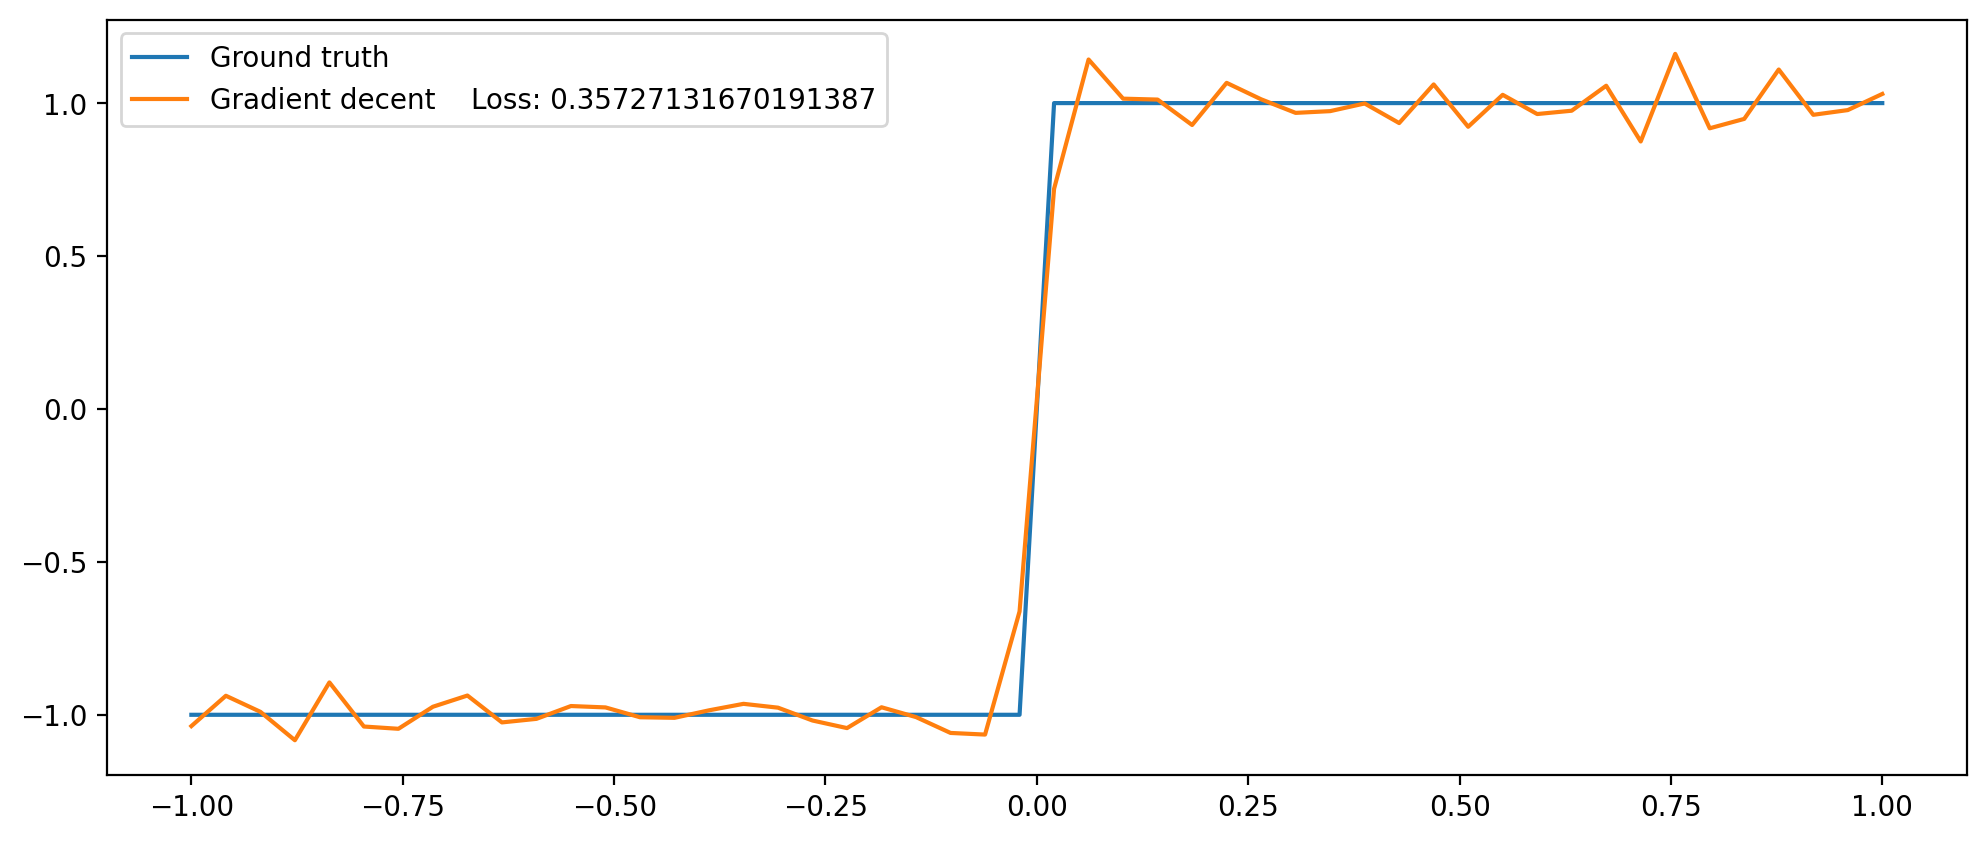

In [13]:
plt.figure(figsize=(12,5),dpi=200)
x = np.linspace(-1,1,50)
y = step_func(x)
plt.plot(x,y,label=f"Ground truth")


weights = np.random.randn(22,6)
weights = update_weights(weights,epochs=200,lr=0.0075,print_loss=True,lr_random=False,delta=0.01)
y_pred_gradient_decent = predict(weights)
plt.plot(x,y_pred_gradient_decent,label=f"Gradient decent    Loss: {loss_func(y,y_pred_gradient_decent)}")

plt.legend();